# Credits

This notebook took many ideas from the exploratory data analysis from the following Kaggle kernel:

https://www.kaggle.com/hely333/explore-avocados-from-all-sides 

# Predicting Avocado prices

In this tutorial, we will analyze the avocado prices on different US cities and attempt to predict their future prices based on their type, production, and region.


For that, we will use the [Avocado Prices dataset from Kaggle](https://www.kaggle.com/neuromusic/avocado-prices), compiled from the [Hass Avocado Board website](https://www.hassavocadoboard.com/retail/volume-and-price-data).

he dataset is a table with the weekly 2015-2018 retail scan data for National retail volume (units) and price. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (**PLU**) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

The tables columns are as follows:

- **Date** : The date of the observation.
- **AveragePrice** : the average price of a single avocado in USD.
- **type** : conventional or organic.
- **year** : the year of the observation (redundant information).
- **region** : Region 
- **Total Volume** : Total number of avocados sold.
- **4046** : Total number of avocados with PLU 4046 sold (small Hass).
- **4225** : Total number of avocados with PLU 4225 sold (large Hass).
- **4770** : Total number of avocados with PLU 4770 sold (extra large Hass).
- **Total Bags** : total number of bags sold including all types.
- **Small Bags** : total number of bags sold of small Hass.
- **Large Bags** : total number of bags sold of large Hass.
- **XLarge Bags** : total number of bags sold of extra large Hass.	

## Let's load the dataset first

First, download the dataset zip file [from Kaggle's website](https://www.kaggle.com/neuromusic/avocado-prices/downloads/avocado.csv/1) and unzip it in the same folder where this notebook is.

Then we can read the dataset with Pandas.

In [1]:
import pandas as pd
avocato_ds = pd.read_csv('avocado.csv')

Let's see its contents using the [head method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)

In [2]:
avocato_ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The first column and the second column contains an aritmetic progression staring from 0. These are equivalent to the row number.

Now let's see the columns types and if the contains missing or non-null values using the [info method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info).

In [3]:
avocato_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Dataset info**

- The number of entries (weeks observed) is 18249 
- All the columns contains **18249 non-null objects** (equal to the number of entries). Hence, we don't have missing values.
- We are using 1.9 MB
- The column "Date" type is object, which means a string in pandas. 

### The date column

It is more convenient to convert the "Date" column to a datetime object which allows arithmetic operations between different times. For this we will use Panda's [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime) function.

In [4]:
avocato_ds['Date'] = pd.to_datetime(avocato_ds['Date'])

Now let's make sure that the rows are sorted by date using the [sort](https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort.html) DataFrame method.
This will become useful when we plot different columns.

In [5]:
avocato_ds.sort_values('Date',axis=0, ascending=True, inplace=True)
# the axis keyword indicates along which direction to sort: the index (0) or columns (1).
# ascending=True : sort in ascending order
# the inplace=True keyword modifies the DataFrame in place (do not create a new object).

#### Data cleaning 

Let's clean the dataset a little bit. The "Unammed: 0" and "year" column do not provide useful information. We can remove them using the [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)  method.

In [6]:
avocato_ds.drop(['Unnamed: 0', 'year'], axis=1,inplace=True)
# the axis keyword indicates where to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
# the inplace=True keyword modifies the DataFrame in place (do not create a new object).
avocato_ds.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,Chicago


# Exploratory data analysis and data cleaning

The exploratory data analysis (EDA) is an approach to analyze datasets to summarize their main characteristics. 
The objective of the EDA is to initial step in every data science project were you explore the characteristics of the data, find patterns or anomalies, test assumptions about the relationship between variables, etc.
In a nutshell, the main goal is to maximize your knowledge of the dataset. 

Let's explore the contents of the columns containg strings columns.

In [7]:
avocato_ds['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [8]:
avocato_ds['type'].unique()

array(['organic', 'conventional'], dtype=object)

What we care the most when we buy avocados is their price. Let's start by plotting the temporal evolution of their prices.
Let's start by plotting the average avocato prices for each type sold on the entire US (*TotalUS* region).
We are going to select the rows in the [DataFrame by using bolean indexes](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#different-choices-for-indexing).

In [9]:
# Let's import matplotlib first
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

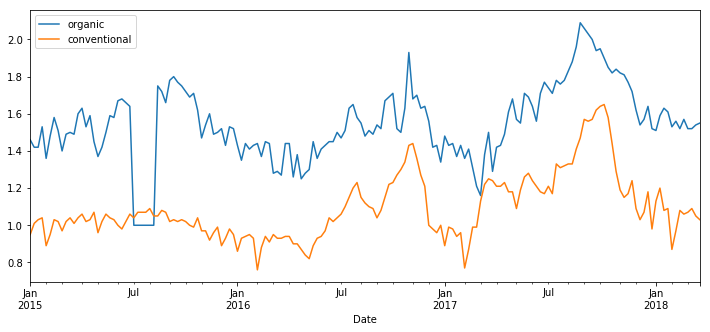

In [10]:
select_US = avocato_ds['region']=='TotalUS'

select_organic = avocato_ds['type']=='organic'

select_conventional = avocato_ds['type']=='conventional'

# The plot DataFrame's method return a matplotlib axes instance that can be reused in other plot() calls
ax=avocato_ds[select_US&select_organic].plot(x='Date',y='AveragePrice',
                                             label='organic', figsize=(12,5))

avocato_ds[select_US&select_conventional].plot(x='Date',y='AveragePrice',
                                               label='conventional',ax=ax)

**There is something weird in the organic average price aorund Jun to Aug, 2015.**
The prices drop to 1 USD and mantain that price over a few weeks.
This is probably an error in the dataset.
Luckly, we have the average price and total number of avocatos sold by region. We can compute our own TotalUS prices and compare it with the actual values in the dataset. 

## Let's fix the TotalUS prices 

To obtain the Average Price over the entire US, we need to compute the total USD sold on each region,
compute the total by region, and then divide by the total number of advocatos sold on the US.

In [11]:
# Let's add the "Total Sold" column with the amount in USD sold each week (each row)
avocato_ds['Total Sale']=avocato_ds['Total Volume']*avocato_ds['AveragePrice']

# Let's select the main regions
# The main regions are described in https://www.hassavocadoboard.com/retail/volume-and-price-data
regions= ['Southeast', 'GreatLakes', 'Northeast', 'West',
          'California',  'Plains',  'Midsouth', 'SouthCentral']

# Reminder: ' | ' represents the 'or' logical operator
select_major_regions = avocato_ds['region'] == regions[0]
for region in regions[1:]:
    select_major_regions = select_major_regions | (avocato_ds['region'] == region )

# select_major_regions is a boolean Series, with a True value on the rows that 
# correspond any of the main region. False otherwise.
organic_ds = avocato_ds[select_organic & select_major_regions]

# Let's create a copy of the dataset with only the features we are interested in.
organic_ds_short = organic_ds[['Date','Total Sale', 'Total Volume']]
   
# We take the total value for each week
organic_ds_short=organic_ds_short.groupby('Date').sum()
organic_ds_short.head()

,Total Sale,Total Volume
Date,,
2015-01-04,8.932080e+05,612910.15
2015-01-11,9.555950e+05,669528.90
2015-01-18,1.014165e+06,713119.99
2015-01-25,8.542015e+05,556368.88
2015-02-01,1.010141e+06,740896.96


In [12]:
# Compute the US Average price. 
us_average_price = organic_ds_short['Total Sale']/organic_ds_short['Total Volume']
# us_average_price is a pandas Series, with the date as index
print(type(us_average_price))

us_average_price.head()

<class 'pandas.core.series.Series'>


Date
2015-01-04    1.457323
2015-01-11    1.427265
2015-01-18    1.422151
2015-01-25    1.535315
2015-02-01    1.363402
dtype: float64

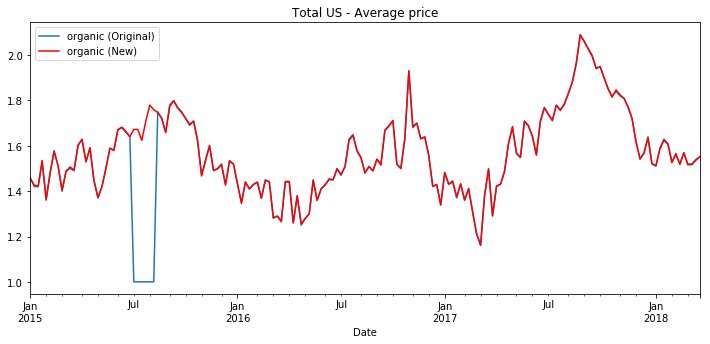

In [13]:
ax=avocato_ds[select_US&select_organic].plot(x='Date',y='AveragePrice',
                                             label='organic (Original)',
                                             legend=True, figsize=(12,5))
us_average_price.plot(ax=ax,label='organic (New)',legend=True, color='r')
ax.set_title('Total US - Average price');

Solved! Well, at least partially. 

We still need to __fix the values__ in our DataFrame **avocato_ds**.

For that, in **avocato_ds**, we need to replace the "AveragePrice" values on all the rows where region="TotalUS" and type='organic', by the values on **us_average_price** that we just compute. 

Let's review the data that we need to use:
- **us_average_price** : Series index=Date , values=AveragePrice
- **avocato_ds** : DataFrame, index=row number, we need to replace the values in the AveragePrice column.

The series are using different indexes. This make simple assignments between DataFrame columns and series not possible.

Let's create an auxiliary **us_average_price** Series that uses the row numbers as index.

In [14]:
select_US = avocato_ds['region']=='TotalUS'
select_organic = avocato_ds['type']=='organic'

# Let's create a new DataFrame with the columns we need.
aux_series = avocato_ds[select_US&select_organic][['Date','AveragePrice']]

# Add the another column with the row number
aux_series['row']=aux_series.index

aux_series.head(2)

,Date,AveragePrice,row
11829,2015-01-04,1.46,11829
11828,2015-01-11,1.42,11828


In [15]:
# Let's use Date as index
aux_series.set_index('Date',drop=False, inplace=True)
aux_series.head(3)

,Date,AveragePrice,row
Date,,,
2015-01-04,2015-01-04,1.46,11829
2015-01-11,2015-01-11,1.42,11828
2015-01-18,2015-01-18,1.42,11827


Now, **aux_series** and **us_average_price** uses the 'Date' as indexes. 

Let's check that the indexes are identical.

In [16]:
aux_series.index.equals(us_average_price.index)

True

In [17]:
# Let's assing the values to AveragePrice
aux_series['AveragePrice'] = us_average_price
aux_series.head()

,Date,AveragePrice,row
Date,,,
2015-01-04,2015-01-04,1.457323,11829
2015-01-11,2015-01-11,1.427265,11828
2015-01-18,2015-01-18,1.422151,11827
2015-01-25,2015-01-25,1.535315,11826
2015-02-01,2015-02-01,1.363402,11825


If the indexes are not identical, not-a-number values are assignment on non overlapping indexes.

Now, we are ready to update the old AveragePrice with the new computed ones using the DataFrame's [update](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.update.html) method.

In [18]:
# Set the index as row
aux_series.set_index('row',drop=False, inplace=True)

# Create a copy
avocato_ds_fix=avocato_ds.copy()

# Update the AveragePrice in the corresponding rows only.
avocato_ds_fix['AveragePrice'].update(aux_series['AveragePrice'])

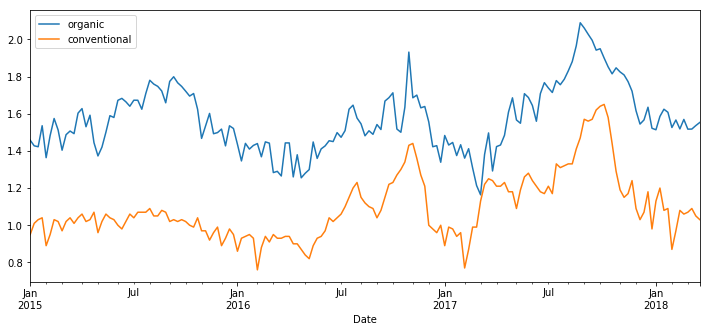

In [19]:
select_US = avocato_ds_fix['region']=='TotalUS'

select_organic = avocato_ds_fix['type']=='organic'

select_conventional = avocato_ds_fix['type']=='conventional'

# The plot DataFrame's method return a matplotlib axes instance that can be reused in other plot() calls
ax=avocato_ds_fix[select_US&select_organic].plot(x='Date',y='AveragePrice',
                                             label='organic', figsize=(12,5))

avocato_ds_fix[select_US&select_conventional].plot(x='Date',y='AveragePrice',
                                               label='conventional',ax=ax)

## Exercises

### 1) Plot the Average prices for different regions and type.

In [20]:
# avocato_ds.head()

### 2) Plot the Average prices over the US together with the Total Volume. Are they correlated? 
Use [plot.scatter method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

In [21]:
# 

### 3) Plot the Average prices over the US together with the Total Bags. Are they correlated? 

# Predicting avocados prices

Stay tunned for part two ;)